In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('bhp.csv')
df.shape

(13200, 7)

In [3]:
min_threhold,max_threhold = df['price_per_sqft'].quantile([0.001,0.999])
min_threhold,max_threhold

(1366.184, 50959.36200000098)

In [4]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [5]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [6]:
df2 = df[(df['price_per_sqft']<max_threhold) & (df['price_per_sqft']>min_threhold)]
df2.shape

(13172, 7)

<Axes: xlabel='price_per_sqft', ylabel='Count'>

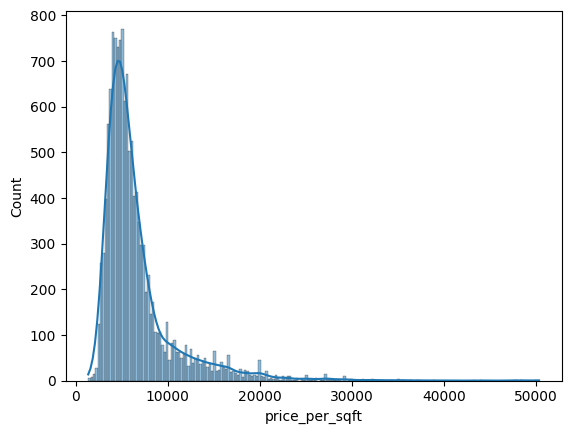

In [7]:
sns.histplot(df2['price_per_sqft'],kde=True)

In [8]:
outliers = df[(df['price_per_sqft']<min_threhold) | (df['price_per_sqft']>max_threhold)]
outliers["price_per_sqft"]

345        672727
665           371
798           729
1005       200000
1106       625000
1867          267
2392         1250
3934         1300
4044     12000000
4924      2300000
5343          416
5417         1250
5597         1363
5911        51111
6356        76530
7012        76923
7166          573
7575       176470
7799        53150
7862          875
8300         1166
8307        56000
9144          729
9436        52083
11447      363333
11635         500
12328       59770
12355         912
Name: price_per_sqft, dtype: int64

In [9]:
df2.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13172.000000,13172.000000,13172.000000,13172.000000,13172.000000
mean,1537.861049,2.690100,111.591865,2.799651,6663.653735
std,967.123711,1.337026,145.372047,1.291130,4141.020700
min,250.000000,1.000000,8.000000,1.000000,1379.000000
25%,1100.000000,2.000000,50.000000,2.000000,4271.000000
50%,1274.500000,2.000000,71.550000,3.000000,5438.000000
75%,1670.000000,3.000000,120.000000,3.000000,7311.000000
max,30400.000000,40.000000,3600.000000,43.000000,50349.000000


In [10]:
mean  = df2.price_per_sqft.mean()
std = df2.price_per_sqft.std()
std_plus4   = mean + 4*std
std_minus4  = mean - 4*std

In [11]:
df3 = df2[(df2['price_per_sqft']<std_plus4) & (df2['price_per_sqft']>std_minus4)]
df3.shape

(13047, 7)

<Axes: xlabel='price_per_sqft', ylabel='Count'>

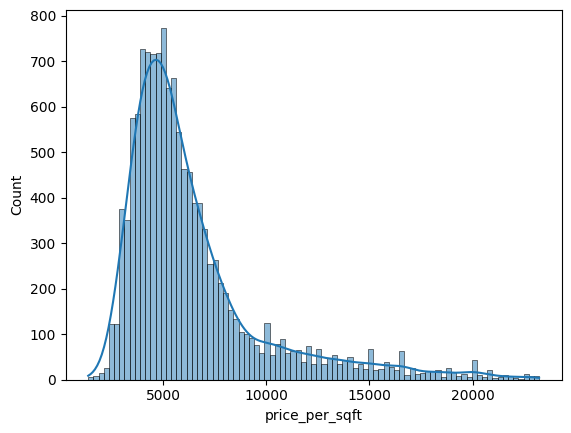

In [12]:
sns.histplot(df3['price_per_sqft'],kde=True)

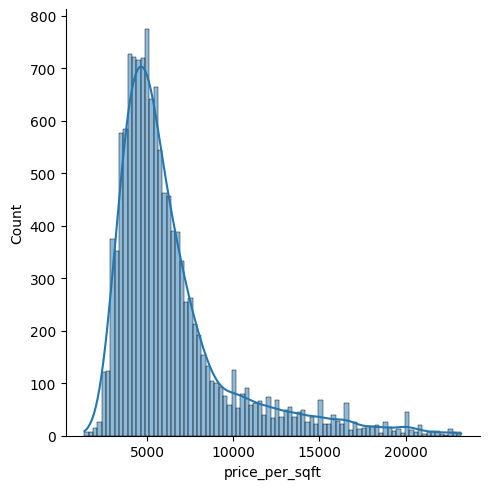

In [13]:
sns.displot(df3['price_per_sqft'],kde=True)

<Axes: xlabel='price_per_sqft', ylabel='Density'>

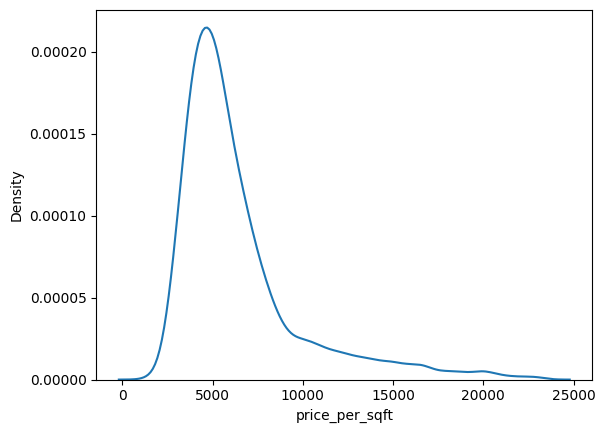

In [14]:
# plot bell curve

sns.kdeplot(df3['price_per_sqft'])

In [15]:
df2['zscore'] = (df2.price_per_sqft - mean)/std
df2.head()

/var/folders/xz/70tkq1hj0nlfp88dsd8c65y00000gn/T/ipykernel_15319/2018699156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price_per_sqft - mean)/std


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


In [16]:
df2.shape

(13172, 8)

In [17]:
df4 = df2[(df2.zscore>-4)&(df2.zscore<4)]
df4.shape

(13047, 8)